In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
energy_dataset = pd.read_csv('C:/Users/Dell/Desktop/Appliances-energy-prediction-data-master/energydata_complete.csv')

In [3]:
energy_dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


<h1> <b> <i>Performing feature tranformation </i> </b> </h1>

In [4]:
energy_dataset.rename(columns={'T1':'TempKitchen','RH_1':'HumKitchen','T2':'TempLivingRoom','RH_2':'HumLivingRoom',
                   'T3':'TempLaundryRoom','RH_3':'HumLaundryRoom','T4':'TempOfficeRoom','RH_4':'HumOfficeRoom',
                   'T5':'TempBathRoom','RH_5':'HumBathRoom','T6':'TempOutsideNorth','RH_6':'HumOutsideNorth',
                   'T7':'TempIroningRoom','RH_7':'HumIroningRoom','T8':'TempTeenagerRoom','RH_8':'HumTeenagerRoom',
                   'T9':'TempParentRoom','RH_9':'_HumParentRoom','T_out':'TempOutside','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)

In [5]:
energy_dataset['date'] = pd.to_datetime(energy_dataset['date'])

In [6]:
## Adding weekday
energy_dataset['Day']=energy_dataset['date'].dt.weekday_name

In [9]:
## Adding time of the day
energy_dataset['hour'] = energy_dataset['date'].dt.hour

In [7]:
## Adding month of the year
energy_dataset['Month'] = energy_dataset['date'].dt.month

In [10]:
## Adding time of the day
energy_dataset['NSM'] = energy_dataset['hour']*3600

<h1> <b> <i>To check if the data is clean </i> </b> </h1>

In [11]:
energy_dataset.isnull().sum()

date                0
Appliances          0
lights              0
TempKitchen         0
HumKitchen          0
TempLivingRoom      0
HumLivingRoom       0
TempLaundryRoom     0
HumLaundryRoom      0
TempOfficeRoom      0
HumOfficeRoom       0
TempBathRoom        0
HumBathRoom         0
TempOutsideNorth    0
HumOutsideNorth     0
TempIroningRoom     0
HumIroningRoom      0
TempTeenagerRoom    0
HumTeenagerRoom     0
TempParentRoom      0
_HumParentRoom      0
TempOutside         0
Pressure            0
Humidity            0
Windspeed           0
Visibility          0
Tdewpoint           0
rv1                 0
rv2                 0
Day                 0
Month               0
hour                0
NSM                 0
dtype: int64

## Hurray!!! The data is clean

In [12]:
from numpy import argmax
# define input string
data = energy_dataset['Day']
print(data)
# define universe of possible input values
day = ['Monday', 'Tuesday', 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(day))
int_to_char = dict((i, c) for i, c in enumerate(day))
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)

0        Monday
1        Monday
2        Monday
3        Monday
4        Monday
5        Monday
6        Monday
7        Monday
8        Monday
9        Monday
10       Monday
11       Monday
12       Monday
13       Monday
14       Monday
15       Monday
16       Monday
17       Monday
18       Monday
19       Monday
20       Monday
21       Monday
22       Monday
23       Monday
24       Monday
25       Monday
26       Monday
27       Monday
28       Monday
29       Monday
          ...  
19705    Friday
19706    Friday
19707    Friday
19708    Friday
19709    Friday
19710    Friday
19711    Friday
19712    Friday
19713    Friday
19714    Friday
19715    Friday
19716    Friday
19717    Friday
19718    Friday
19719    Friday
19720    Friday
19721    Friday
19722    Friday
19723    Friday
19724    Friday
19725    Friday
19726    Friday
19727    Friday
19728    Friday
19729    Friday
19730    Friday
19731    Friday
19732    Friday
19733    Friday
19734    Friday
Name: Day, Length: 19735

In [13]:
corr=energy_dataset.corr()
corr

,Appliances,lights,TempKitchen,HumKitchen,TempLivingRoom,HumLivingRoom,TempLaundryRoom,HumLaundryRoom,TempOfficeRoom,HumOfficeRoom,...,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2,Month,hour,NSM
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,-0.011606,0.216792,0.216792
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,-0.179452,0.255346,0.255346
TempKitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.706305,0.178858,0.178858
HumKitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.094048,0.018594,0.018594
TempLivingRoom,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.533479,0.254784,0.254784
HumLivingRoom,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.097914,-0.183322,-0.183322
TempLaundryRoom,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.790365,0.037624,0.037624
HumLaundryRoom,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.414359,-0.052392,-0.052392
TempOfficeRoom,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.789168,0.088407,0.088407
HumOfficeRoom,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.258167,-0.019068,-0.019068


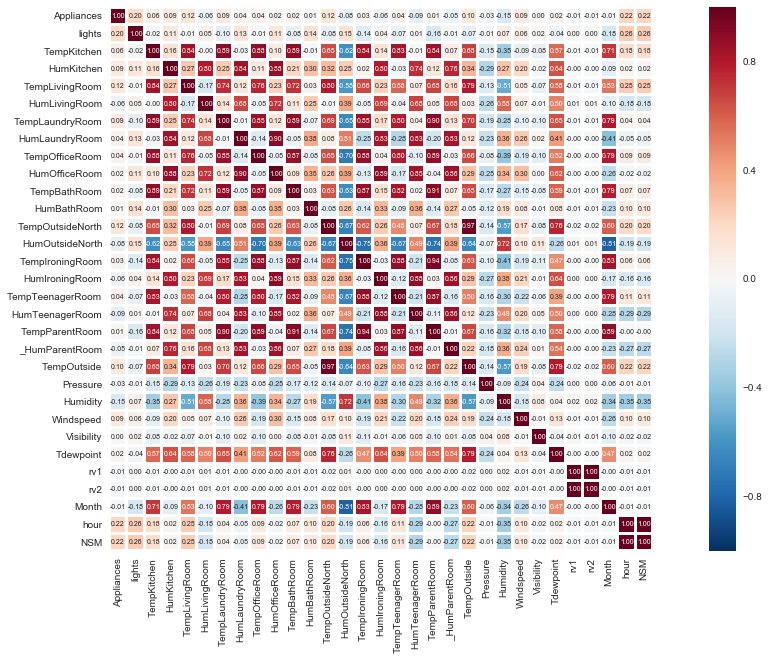

In [14]:
## Checking if relation is significant
plt.figure(figsize=(20,10))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

## From above heatmap, it is clear that random variables, Visibility are not correlated to any of the remaining features thus,they can be removed 

In [24]:
Relevant_features = energy_dataset[['lights','TempKitchen' , 'HumKitchen' , 'TempLivingRoom' , 'HumLivingRoom' , 'TempLaundryRoom' , 'HumLaundryRoom' , 'TempOfficeRoom' , 'HumOfficeRoom' , 'TempBathRoom' , 'HumBathRoom' , 'TempOutsideNorth' , 'HumOutsideNorth' , 'TempIroningRoom' , 'HumIroningRoom' , 'TempTeenagerRoom' , 'HumTeenagerRoom' , 'TempParentRoom' , '_HumParentRoom' , 'TempOutside' , 'Pressure' , 'Humidity', 'Windspeed','Tdewpoint' ] ]

In [25]:
Relevant_features

,lights,TempKitchen,HumKitchen,TempLivingRoom,HumLivingRoom,TempLaundryRoom,HumLaundryRoom,TempOfficeRoom,HumOfficeRoom,TempBathRoom,...,HumIroningRoom,TempTeenagerRoom,HumTeenagerRoom,TempParentRoom,_HumParentRoom,TempOutside,Pressure,Humidity,Windspeed,Tdewpoint
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,5.300000
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,5.200000
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,5.100000
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,5.000000
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,4.900000
5,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,...,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,4.800000
6,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,...,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,4.700000
7,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,...,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,4.683333
8,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,...,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,4.666667
9,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,...,41.500000,18.100000,48.590000,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,4.650000
